In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Input, Dropout, MaxPool2D, 
from keras.models import Model
from keras.layers import Conv2DTranspose, BatchNormalization, add

W oparciu o dane CIFAR10 przeprowadź analogiczne rozumowanie do przedstawionego w punkcie 3 notebooka link tj. dodaj szum do zdjęć i usuń go przy pomocy sieci neuronowej.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train, x_test = x_train/255.0, x_test/255.0

In [4]:
x_train.shape

(50000, 32, 32, 3)

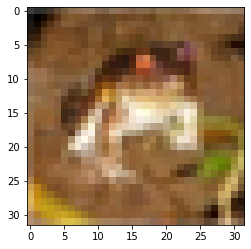

In [5]:
plt.imshow(x_train[0])

In [6]:
# funkcja zaszumiająca
def makeSomeNoise(images, noiseStrengh = 0.1):
    imgsShape = images.shape
    print("imgs shape", imgsShape)
    pixelsNum = imgsShape[0]*imgsShape[1]*imgsShape[2]*imgsShape[3]
    noise = np.random.normal(0,noiseStrengh,pixelsNum).reshape(imgsShape[0],imgsShape[1],imgsShape[2],imgsShape[3])
    imgsNoised = np.add(images, noise)
    return imgsNoised

In [7]:
# funkcja do wyświetlania serii zdjęć
def showImages(data, name):
    samplesNum = data.shape[0]
    f,a=plt.subplots(1,samplesNum,figsize=(20,4))
    for i in range(samplesNum):
        a[i].matshow(data[i])
        a[i].axis('off')
    plt.suptitle(name)
    plt.show()

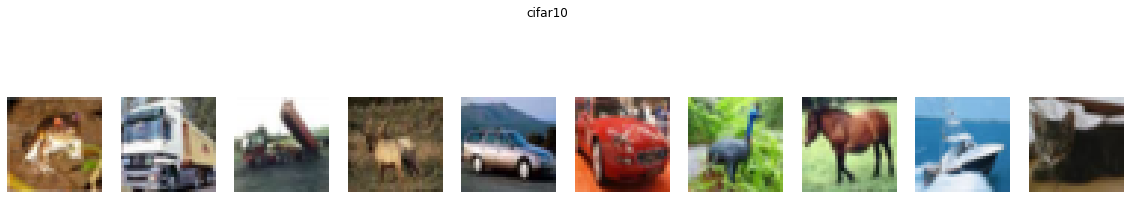

In [8]:
showImages(x_train[:10], "cifar10")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


imgs shape (10, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


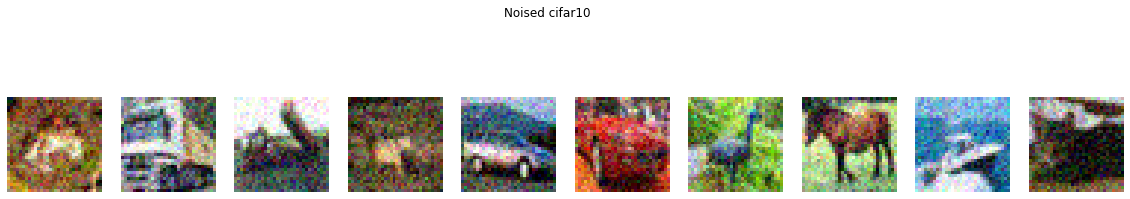

In [9]:
showImages(makeSomeNoise(x_train[:10], 0.1), "Noised cifar10")

In [10]:
x_train_noised = makeSomeNoise(x_train, 0.3)
x_test_noised = makeSomeNoise(x_test, 0.3)

imgs shape (50000, 32, 32, 3)
imgs shape (10000, 32, 32, 3)


In [19]:
#enkoder
model = tf.keras.Sequential([ 
Input(shape=(32, 32, 3)), 
Conv2D(256, (3,3), activation='relu', padding='same'),
Conv2D(128, (3,3), activation='relu', padding='same'), 
Conv2D(64, (3,3), activation='relu', padding='same'),
Dropout(0.5),
#dekoder    

Conv2DTranspose(128, kernel_size=3, activation='relu', padding='same'), 
Conv2DTranspose(256, kernel_size=3, activation='relu', padding='same'),
Conv2DTranspose(512, kernel_size=3, activation='relu', padding='same'),
BatchNormalization(),
Conv2D(3, kernel_size=(3,3), activation='sigmoid', padding='same')]) 
  
 
model.compile(loss='mse', metrics=['accuracy'])
model.summary()
#próbowałem dodać Maxpool2D jednak to mi psuło budowę modelu więc zrezygnowałem 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 128)       295040    
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 32, 32, 128)      73856     
 ranspose)                                                       
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 32, 32, 256)      295168    
 Transpose)                                           

In [20]:
history = model.fit(x_train_noised, 
                x_train,
                batch_size=256,
                epochs=5, 
                shuffle=True, 
                validation_data=(x_test_noised, x_test))

Epoch 1/5
196/196 [==============================] - 187s 898ms/step - loss: 0.0246 - accuracy: 0.4476 - val_loss: 0.0170 - val_accuracy: 0.4119
Epoch 2/5
196/196 [==============================] - 172s 876ms/step - loss: 0.0121 - accuracy: 0.5605 - val_loss: 0.0612 - val_accuracy: 0.5957
Epoch 3/5
196/196 [==============================] - 181s 923ms/step - loss: 0.0078 - accuracy: 0.6367 - val_loss: 0.0073 - val_accuracy: 0.6418
Epoch 4/5
196/196 [==============================] - 180s 918ms/step - loss: 0.0069 - accuracy: 0.6685 - val_loss: 0.0146 - val_accuracy: 0.5788
Epoch 5/5
196/196 [==============================] - 180s 916ms/step - loss: 0.0065 - accuracy: 0.6820 - val_loss: 0.0086 - val_accuracy: 0.6873


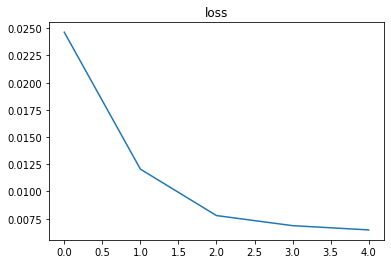

In [21]:
plt.plot(history.history["loss"])
plt.title("loss")
plt.show()

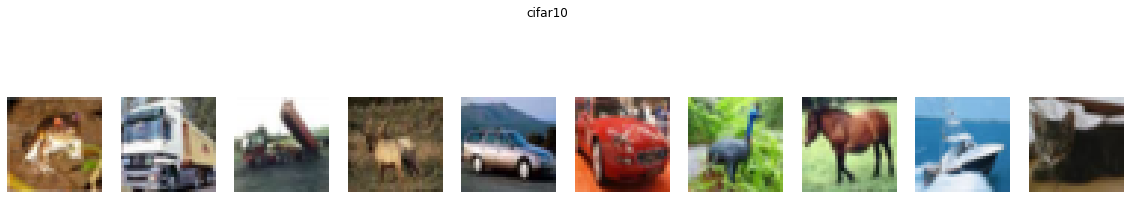

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

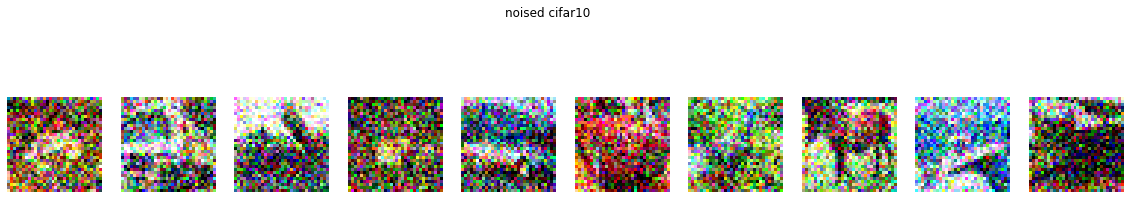

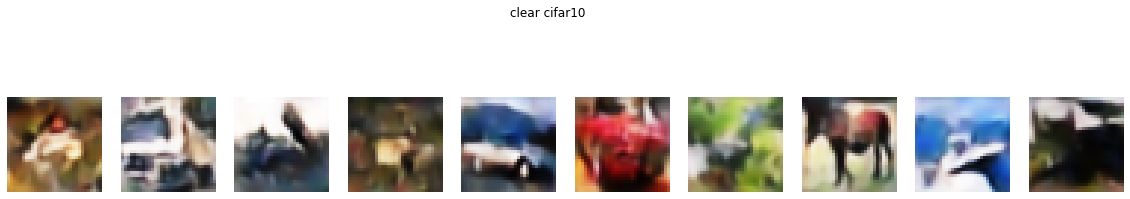

In [22]:
howMany = 10
# oryginalne
showImages(x_train[:howMany], "cifar10")
# zaszumione
showImages(x_train_noised[:howMany], "noised cifar10")
# odszumione
showImages(model.predict(x_train_noised[:howMany]), "clear cifar10")